In [1]:
# 필요한 패키지
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy
from scipy import linalg as la
import scipy.stats as ss
import scipy.special

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic' #  Windows 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

# 필요한 패키지 2
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
import sympy

scipy.__version__

ModuleNotFoundError: No module named 'pgmpy'

In [2]:
import numpy as np
from scipy import stats

# 가상의 두 집단 점수
group_A = np.array([85, 90, 88, 75, 78, 84, 82])   # A 방식 수업
group_B = np.array([70, 68, 72, 65, 74, 69, 73])   # B 방식 수업

# 1. t-검정 수행 (독립표본)
t_stat, p_val = stats.ttest_ind(group_A, group_B, equal_var=True)

# 2. Cohen's d 계산
n1, n2 = len(group_A), len(group_B)
s1, s2 = np.std(group_A, ddof=1), np.std(group_B, ddof=1)
pooled_sd = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / (n1 + n2 - 2))
mean_diff = np.mean(group_A) - np.mean(group_B)
cohen_d = mean_diff / pooled_sd

# 결과 출력
print(f"평균 차이: {mean_diff:.2f}")
print(f"독립표본 t-검정 결과: t = {t_stat:.3f}, p = {p_val:.4f}")
print(f"효과크기 (Cohen's d): {cohen_d:.3f}")

평균 차이: 13.00
독립표본 t-검정 결과: t = 5.583, p = 0.0001
효과크기 (Cohen's d): 2.984


## 1. 단일 평균 검정 (1-sample t-test)
- 시나리오: 제약회사, 약물이 평균적으로 혈압을 10정도 낮춰줌
- 30명의 환자를 복용시킨 결과, 평균 감소량 9.2, 표준편차 2.5
- 질문 : 이 약물이 정말 10을 낮춰주는 게 맞는가?
- 가설설정
  + 귀무가설 : 평균이 10인가? (평균 혈압 감소량 10)
  + 대립가설 : 평균이 10이 아니다. (평균 혈압 감소량은 10이 아니다.)

In [3]:
from scipy import stats
# sf method
mu_0 = 10
x_bar = 9.2
s = 2.5
n = 30

t_stat = (x_bar - mu_0) / (s/(n**0.5))
p_value = stats.t.sf(abs(t_stat), df = n-1) * 2 # 양측 검정
t_stat, p_value

(-1.752712184016533, np.float64(0.09021916886959588))

## 2. 단일 평균 검정
- 학생들의 평균 점수는 75점으로 알려져 있음
- 임의로 선택한 25명의 평균 72점, 표준편차는 6
- 위 그룹은 평균보다 성적이 낫다고 말할 수 있는가?
  + 단측검정
  + cdf() 활용
  + p.188
- 가설 설정
  + 귀무가설 : 학생들의 평균점수가 75이다. (평균 = 75)
  + 대립가설 : 학생들의 평균점수가 75보다 낮다. (평균 < 75)

In [5]:
from scipy import stats
# sf method
mu_0 = 75
x_bar = 72
s = 6
n = 25
df = n-1 # 표본 검정

t_stat = (x_bar - mu_0) / (s/(n**0.5))
p_value = stats.t.cdf(t_stat, df = df)
t_stat, p_value

(-2.5, np.float64(0.009827087558289377))

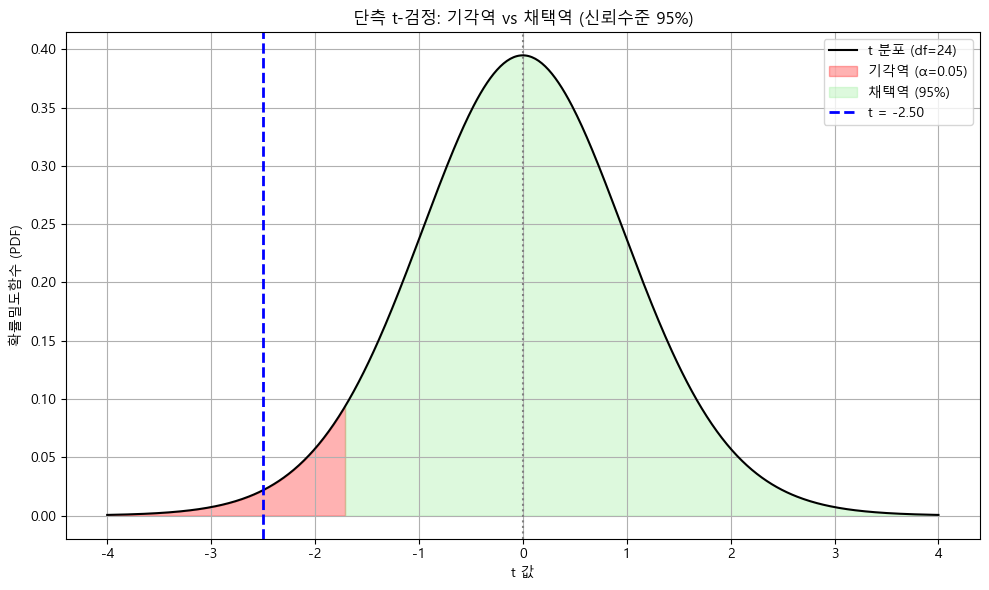

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 주어진 값
x_bar = 72
mu_0 = 75
s = 6
n = 25
df = n - 1

# t 통계량 및 신뢰구간
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha, df)

# 시각화 범위 설정
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label=f't 분포 (df={df})', color='black')

# 기각역 (좌측 5%)
x_reject = np.linspace(-4, -t_crit, 200)
y_reject = stats.t.pdf(x_reject, df)
ax.fill_between(x_reject, y_reject, color='red', alpha=0.3, label='기각역 (α=0.05)')

# 채택역
x_accept = np.linspace(-t_crit, 4, 200)
y_accept = stats.t.pdf(x_accept, df)
ax.fill_between(x_accept, y_accept, color='lightgreen', alpha=0.3, label='채택역 (95%)')

# 실제 t 값 선
ax.axvline(t_stat, color='blue', linestyle='--', linewidth=2, label=f't = {t_stat:.2f}')

# 기준선
ax.axvline(0, color='gray', linestyle=':')

# 제목 및 레이블
ax.set_title('단측 t-검정: 기각역 vs 채택역 (신뢰수준 95%)')
ax.set_xlabel('t 값')
ax.set_ylabel('확률밀도함수 (PDF)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

# 단일 비율 검정 (ch.16)
- p.286
- 브랜드는 고객 만족도가 90% 이상이라고 주장
- 100명 중 85명이 만족했다고 응답했다.
- 단측검정
- 가설설정
  + 귀무가설 : 만족도 90% 이상
  + 대립가설 : 만족도 90% 보다 낮다.
- 모비율 검정의 핵심 원리 : 이항분포의 개념과 정규분포에 근사한다는 핵심이론이 내재되어 있음
  + 정규분포의 근사 조건 기억

In [9]:
from statsmodels.stats.proportion import proportions_ztest

count = 85
numbers = 100
prop = 0.9 # 주장된 비율, 귀무가설의 핵심 정보
z_stat, p_val = proportions_ztest(count, numbers, prop, alternative='smaller')
print(z_stat, p_val)

-1.400280084028011 0.0807147311835415


## 두 집단 평균 검정
- 남학생 평균 점수 78, 표준편차 5, 30명
- 여학생 평균 점수 82, 표준편차 6, 28명
- 가설 설정 (양측검정)
  + 귀무가설 : 
  + 대립가설 :

In [10]:
mean1, std1, n1 = 78,5,30
mean2, std2, n2 = 82,6,28

t_stat, p_val = stats.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)
print(t_stat, p_val)

-2.7652775633629223 0.00768782709788618


## 모비율 검정
- A회사 백신, 500명 중 30명 부작용
- B회사 백신, 520명 중 20명 부작용
- 두 회사 백신이ㅡ 부작용 발생률은 같나?
- 가설설정
  + 귀무가설 : 두 회사 백신의 부작용 발생률은 같다.
  + 대립가설 : 두 회사 백신의 부작용 발생률은 다르다.

In [11]:
from statsmodels.stats.proportion import proportions_ztest

counts = [30,20]
nobs = [500,520]

proportions_ztest(counts, nobs)

(np.float64(1.5926874927753842), np.float64(0.11123031473318154))

## 분산 비교 (품질)
- 기계1 : 분산 4.0, n = 20
- 기계2 : 분산 6.2, n = 25

- 궁금점
  + 두 기계에서 나온 생산품 품질은 일관성이 있나.
 
- 귀무가설 : 두 분산비는 같다. ( 두 기계의 생산품 품질은 같다 -> 일관성이 있다.)
- 대립가설 : 두 분산비는 다르다. ( 두 기계의 생산품 품질은 다르다 -> 이로간성이 없다.)

In [12]:
from statsmodels.stats.proportion import proportions_ztest

var1, var2 = 4.0, 6.2
n1, n2 = 20, 25

f_stat = var1 / var2
p_val = stats.f.cdf(f_stat, dfn=n1-1, dfd=n2-1) * 2
f_stat, p_val

(0.6451612903225806, np.float64(0.33284420398399234))